In [1]:
import tensorflow as tf
from keras.layers import Dropout
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.10.0
2.10.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

## pre-processing

In [6]:
X_valid, X_train = X_train_full[:10000]/255.0, X_train_full[10000:]/255.0
y_valid, y_train = y_train_full[:10000]/255.0, y_train_full[10000:]
X_test = X_test/255.0

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag",
              "Ankle Boot"]

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(Dropout(0.3))
model.add(keras.layers.Dense(600, activation = 'sigmoid'))
model.add(keras.layers.Dense(400, activation = 'leaky_relu'))
model.add(keras.layers.Dense(150, activation = 'leaky_relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 600)               471000    
                                                                 
 dense_1 (Dense)             (None, 400)               240400    
                                                                 
 dense_2 (Dense)             (None, 150)               60150     
                                                                 
 dense_3 (Dense)             (None, 10)                1510      
                                                                 
Total params: 773,060
Trainable params: 773,060
Non-trai

In [10]:
model.layers

In [11]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "Adam", metrics = ["accuracy"])

In [12]:
history = model.fit(X_train, y_train, epochs=28, validation_data = (X_valid, y_valid))

Epoch 1/28
1563/1563 [==============================] - 12s 7ms/step - loss: 0.5755 - accuracy: 0.7845 - val_loss: 7.6042 - val_accuracy: 0.0686
Epoch 2/28
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4404 - accuracy: 0.8358 - val_loss: 8.8772 - val_accuracy: 0.0503
Epoch 3/28
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3987 - accuracy: 0.8504 - val_loss: 8.6358 - val_accuracy: 0.0782
Epoch 4/28
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3740 - accuracy: 0.8580 - val_loss: 9.4018 - val_accuracy: 0.0668
Epoch 5/28
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3504 - accuracy: 0.8687 - val_loss: 8.9117 - val_accuracy: 0.0855
Epoch 6/28
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3368 - accuracy: 0.8726 - val_loss: 9.8820 - val_accuracy: 0.0823
Epoch 7/28
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3215 - accuracy: 0.8788 - val_loss: 10.6171 - val_a

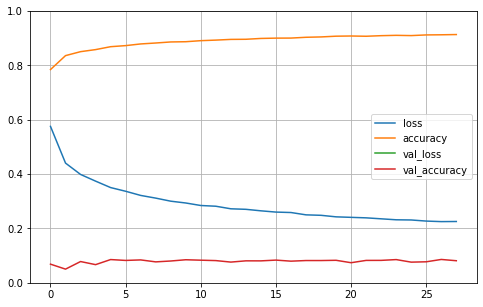

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize =(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3262 - accuracy: 0.8932


[0.32616838812828064, 0.8931999802589417]

In [15]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(3)

1/1 [==============================] - 0s 129ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.009, 0.   ,
        0.991],
       [0.   , 0.   , 0.996, 0.   , 0.   , 0.   , 0.004, 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)